In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import  datasets

In [2]:
x,y = datasets.make_moons()

In [3]:
x.shape

(100, 2)

In [4]:
y.shape

(100,)

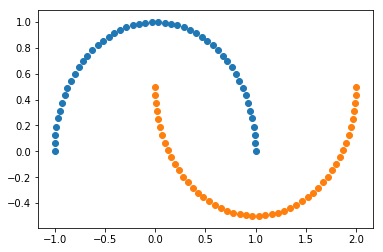

In [5]:
plt.scatter(x[y==0,0],x[y==0,1])
plt.scatter(x[y==1,0],x[y==1,1])
plt.show()

In [9]:
x,y = datasets.make_moons(noise = 0.15,random_state=666 )#0.15标准差

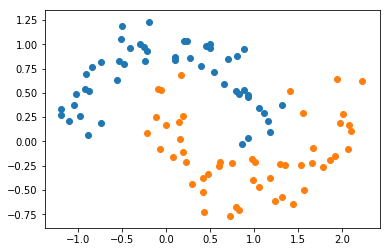

In [10]:
plt.scatter(x[y==0,0],x[y==0,1])
plt.scatter(x[y==1,0],x[y==1,1])
plt.show()

#### 使用多项式特征的SVM
#### 处理非线性问题，通过使用多项式的方式来扩充原本的数据，制造新的
#### 多项式特征

In [23]:
from sklearn.preprocessing import  PolynomialFeatures,StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import  Pipeline
from matplotlib.colors import ListedColormap

In [24]:
def PolynomialSVC(degree,C=1.0):
    return Pipeline([
        ("ply",PolynomialFeatures(degree=degree)),
        ('std_scalar',StandardScaler()),
        ('linearSVC',LinearSVC(C=C))
    ])

In [25]:
ploy_svc = PolynomialSVC(degree=3)

In [26]:
ploy_svc.fit(x,y)

Pipeline(memory=None,
     steps=[('ply', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('std_scalar', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linearSVC', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [72]:
#.reshape(-1,1)表示只固定列为1列，行不知道，自动确定
#同理，.reshape(2,-1）表示只确定行，列系统自动确定。
def plot_decision_boundary(model,axis):
    
    x0,x1 = np.meshgrid(
            np.linspace(axis[0],axis[1],int((axis[1]-axis[0])*100)).reshape(-1,1) ,
            np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*100)).reshape(-1,1)
    )
    x_new = np.c_[x0.ravel(),x1.ravel()]
    y_predict = model.predict(x_new)
    zz  = y_predict.reshape(x0.shape)
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    plt.contourf(x0,x1,zz,linewidth=5,cmap=custom_cmap)


C:\Users\admin\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


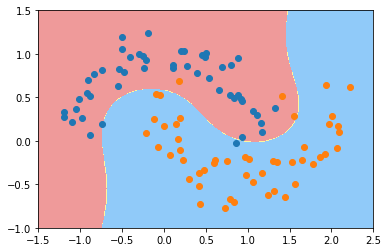

In [73]:
plot_decision_boundary(ploy_svc,axis=[-1.5,2.5,-1.0,1.5])
plt.scatter(x[y==0,0],x[y==0,1])
plt.scatter(x[y==1,0],x[y==1,1])
plt.show()

####  使用多项式核函数的SVM

In [74]:
from sklearn.svm import  SVC
def polynormialKernelSVC(degree,C=1.0):
    return Pipeline([
        ("std_scaler",StandardScaler()),
        ("kernelSCV",SVC(C=1.0,kernel='poly',degree=degree))#多项式核
    ])

In [75]:
poly_kernel_svc = polynormialKernelSVC(degree=3)
poly_kernel_svc.fit(x,y)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kernelSCV', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

C:\Users\admin\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


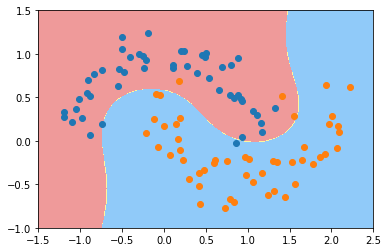

In [77]:
plot_decision_boundary(ploy_svc,axis=[-1.5,2.5,-1.0,1.5])
plt.scatter(x[y==0,0],x[y==0,1])
plt.scatter(x[y==1,0],x[y==1,1])
plt.show()